In [1]:
import rioxarray as rxr
from tqdm.auto import tqdm
import os
from glob import glob
from haversine import haversine, Unit, haversine_vector

from garuda.data import GeoDataset
from garuda.utils import obb_labels_from_geojson
from garuda.config import set_n_cpus
set_n_cpus(8)

GARUDA INFO     : Number of CPUs set to 8


In [2]:
image_paths = glob("/home/patel_zeel/BrickKilns_v2/data/sentinel/full/delhi_sarath_grid/images/*.tif")
labels = obb_labels_from_geojson("/home/patel_zeel/BrickKilns_v2/geojson_labels/v4/delhi_sarath_grid.geojson")
len(image_paths), len(labels)

(342, 783)

In [3]:
labels[0]

BBLabel(box=[[77.440547 28.203442]
 [77.440547 28.203933]
 [77.439517 28.203933]
 [77.439517 28.203442]], 
class_name=Zigzag, 
length_of_object=101.12 m,
width_of_object=54.41 m,

In [4]:
classes = ["CFCBK", "FCBK", "Zigzag"]
data = GeoDataset.from_images_and_labels(image_paths, labels, classes, 10, True, 0.2, 0.2)

GARUDA INFO     : Images are in UTM projection.
GARUDA INFO     : Running deduplication on labels...
GARUDA INFO     : Number of bounding boxes: 783


  0%|          | 0/783 [00:00<?, ?it/s]

  0%|          | 0/783 [00:00<?, ?it/s]

  0%|          | 0/783 [00:00<?, ?it/s]

  0%|          | 0/783 [00:00<?, ?it/s]

GARUDA INFO     : Number of possible intersection pairs: 16
GARUDA INFO     : Computing IOA and IOU ...


  0%|          | 0/16 [00:00<?, ?it/s]

GARUDA INFO     : ##################################################
GARUDA INFO     : Removing overlapping bounding boxes based on IOA
GARUDA INFO     : ##################################################
GARUDA INFO     : Master iteration: 0
GARUDA INFO     : Initial number of bounding boxes: 783
GARUDA INFO     : Number of bounding boxes after removing overlapping boxes: 783
GARUDA INFO     : No more bounding boxes to remove
GARUDA INFO     : ##################################################
GARUDA INFO     : Removing overlapping bounding boxes based on IOU
GARUDA INFO     : ##################################################
GARUDA INFO     : Master iteration: 0
GARUDA INFO     : Initial number of bounding boxes: 783
GARUDA INFO     : Number of bounding boxes after removing overlapping bounding boxes: 783
GARUDA INFO     : No more bounding boxes to remove
GARUDA INFO     : Max IOA: 0.008677420483953653
GARUDA INFO     : Max IOU: 0.004267314890312104
GARUDA INFO     : Final number of

  0%|          | 0/342 [00:00<?, ?it/s]

GARUDA INFO     : Number of images: 342
GARUDA INFO     : Number of images with no labels: 236
GARUDA INFO     : Number of labels: 783
GARUDA INFO     : Number of classes: 3
GARUDA INFO     : Classes: ['CFCBK', 'FCBK', 'Zigzag']
GARUDA INFO     : 
0      9
1    706
2     68
Name: index: number of times same label repeats in multiple images, values: number of such labels, dtype: int64
GARUDA INFO     : 
0.0     236
1.0      24
2.0      19
3.0      10
4.0       3
5.0       2
6.0       8
7.0       3
8.0       1
9.0       4
10.0      3
12.0      1
13.0      5
14.0      5
15.0      4
16.0      1
17.0      2
18.0      1
20.0      1
21.0      1
22.0      1
23.0      1
24.0      1
29.0      1
31.0      1
32.0      1
48.0      1
60.0      1
Name: index: number of labels in a single image, values: number of such images, dtype: int64


  0%|          | 0/342 [00:00<?, ?it/s]

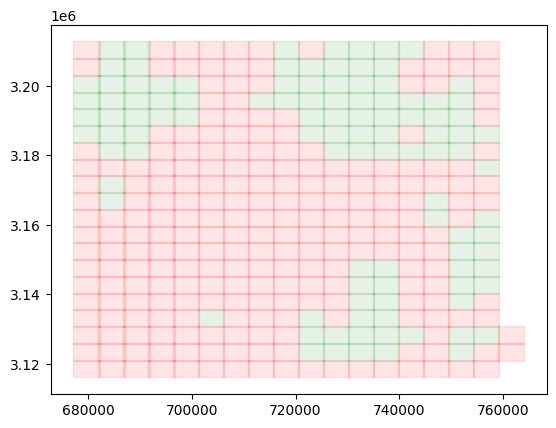

In [5]:
import matplotlib.pyplot as plt
for key, value in tqdm(data.image_to_labels.items()):
    x_min = value['x_min']
    x_max = value['x_max']
    y_min = value['y_min']
    y_max = value['y_max']
    if len(value['label']) > 0:
        plt.fill([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], alpha=0.1, color='green')
    else:
        plt.fill([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], alpha=0.1, color='red')

In [4]:
import asyncio

results = []

async def append_to_list():
    for i in range(10):
        await asyncio.sleep(1)
        results.append(i)
        print(f"Appended: {i}")

# Start the task but do not wait for it to complete
task = asyncio.create_task(append_to_list())

Appended: 0
Appended: 1
Appended: 2
Appended: 3
Appended: 4
Appended: 5
Appended: 6
Appended: 7
Appended: 8
Appended: 9


In [6]:
len(results)

10